In [41]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_validate

sns.set_style('whitegrid')
%matplotlib inline

In [2]:
#Carregamento dos dados
dados = 'dataset-uci.xlsx'
xls = pd.ExcelFile(dados)
print(xls.sheet_names)

['dataset']


In [3]:
try:
    df = pd.read_excel(dados)
except FileNotFoundError:
    print("Erro: O arquivo 'dataset-uci.xlsx' não foi encontrado.")

print("\nDimensões do dataset (linhas, colunas):", df.shape)
print("\nAs 5 primeiras linhas do dataset:")
display(df.head())
print("\nInformações sobre os tipos de dados e valores nulos:")
df.info()


Dimensões do dataset (linhas, colunas): (319, 39)

As 5 primeiras linhas do dataset:


,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
0,0,50,0,0,0,0,0,0,185,92.8,...,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0
1,0,47,0,1,0,0,0,0,176,94.5,...,43.0,103.0,14.0,13.0,46.0,0.87,107.10,0.0,14.4,25.0
2,0,61,0,0,0,0,0,0,171,91.1,...,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2
3,0,41,0,0,0,0,0,0,168,67.7,...,59.0,53.0,20.0,12.0,34.0,1.02,94.10,0.0,15.4,35.4
4,0,42,0,0,0,0,0,0,178,89.6,...,30.0,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6



Informações sobre os tipos de dados e valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 39 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Gallstone Status                                319 non-null    int64  
 1   Age                                             319 non-null    int64  
 2   Gender                                          319 non-null    int64  
 3   Comorbidity                                     319 non-null    int64  
 4   Coronary Artery Disease (CAD)                   319 non-null    int64  
 5   Hypothyroidism                                  319 non-null    int64  
 6   Hyperlipidemia                                  319 non-null    int64  
 7   Diabetes Mellitus (DM)                          319 non-null    int64  
 8   Height                                          319 non-null    in

In [4]:
#Tratamento de dados ausentes
print("Contagem de valores nulos por coluna:")
print(df.isnull().sum())
print(f'Quantidade de valores nulos no dataset:{df.isnull().sum().sum()}')

# Verificacao de Duplicatas
print(f'Numero de duplicatas: {df.duplicated().sum()}')

Contagem de valores nulos por coluna:
Gallstone Status                                  0
Age                                               0
Gender                                            0
Comorbidity                                       0
Coronary Artery Disease (CAD)                     0
Hypothyroidism                                    0
Hyperlipidemia                                    0
Diabetes Mellitus (DM)                            0
Height                                            0
Weight                                            0
Body Mass Index (BMI)                             0
Total Body Water (TBW)                            0
Extracellular Water (ECW)                         0
Intracellular Water (ICW)                         0
Extracellular Fluid/Total Body Water (ECF/TBW)    0
Total Body Fat Ratio (TBFR) (%)                   0
Lean Mass (LM) (%)                                0
Body Protein Content (Protein) (%)                0
Visceral Fat Rating (VFR) 

In [5]:
# Pasta para salvamento das imagens geradas
!mkdir figures
dir_figures = './figures/'

if not os.path.exists(dir_figures):
    os.makedirs(dir_figures)


mkdir: cannot create directory ‘figures’: File exists


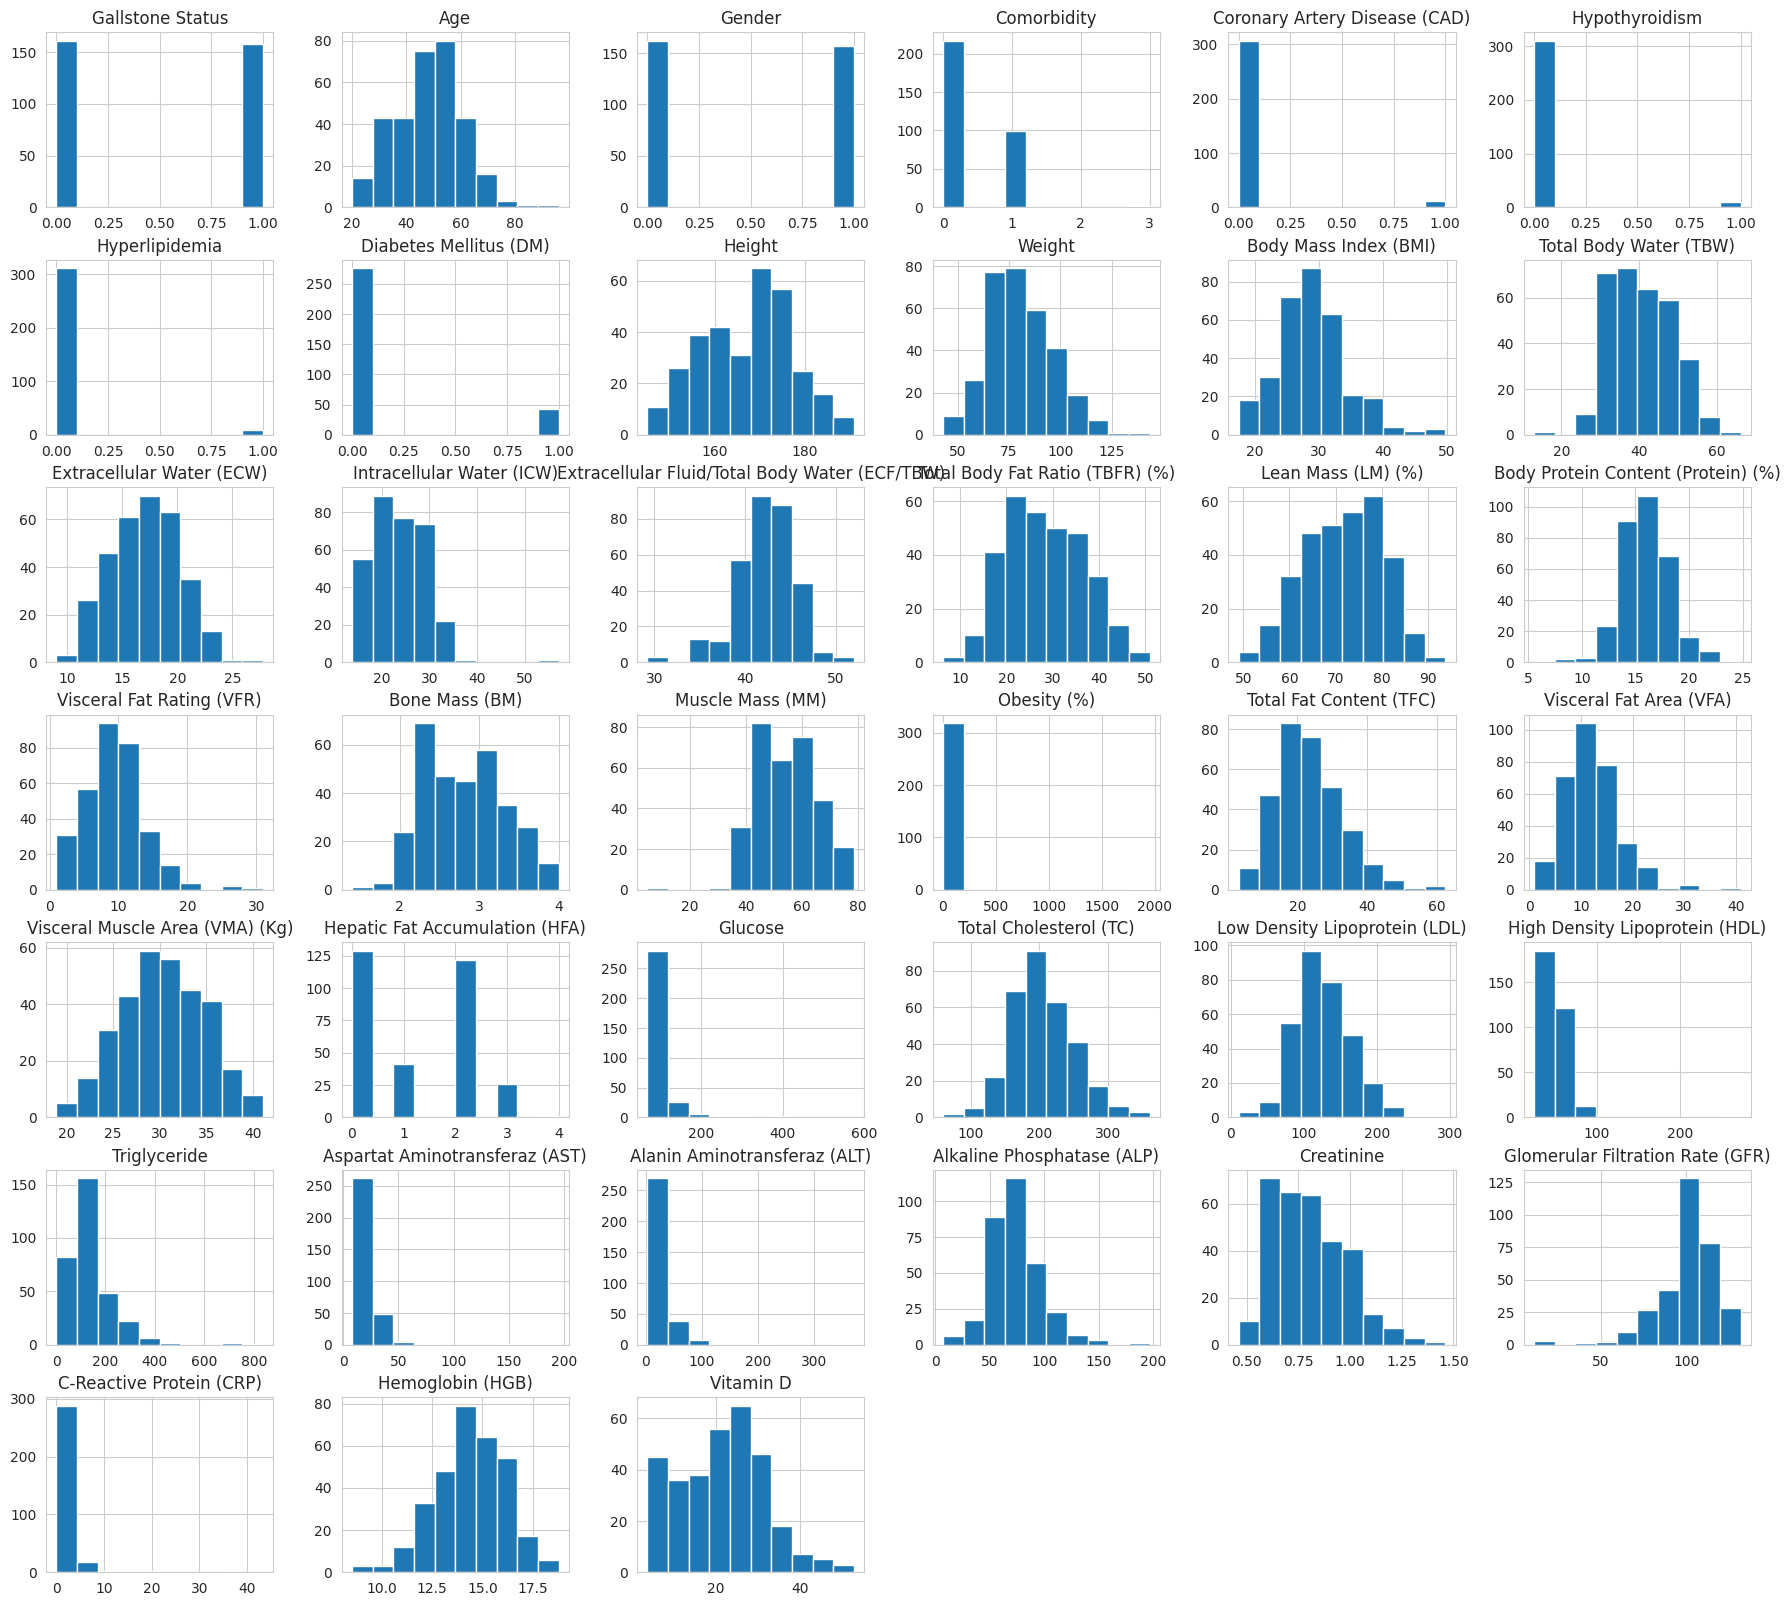

In [6]:
# @title Histogramas
df.hist(figsize=(22, 20))
plt.savefig(f'{dir_figures}/histogram_features.png', bbox_inches='tight', dpi=300)
plt.show()

In [7]:
# Colunas
colunas = df.columns.tolist()
print(colunas)

['Gallstone Status', 'Age', 'Gender', 'Comorbidity', 'Coronary Artery Disease (CAD)', 'Hypothyroidism', 'Hyperlipidemia', 'Diabetes Mellitus (DM)', 'Height', 'Weight', 'Body Mass Index (BMI)', 'Total Body Water (TBW)', 'Extracellular Water (ECW)', 'Intracellular Water (ICW)', 'Extracellular Fluid/Total Body Water (ECF/TBW)', 'Total Body Fat Ratio (TBFR) (%)', 'Lean Mass (LM) (%)', 'Body Protein Content (Protein) (%)', 'Visceral Fat Rating (VFR)', 'Bone Mass (BM)', 'Muscle Mass (MM)', 'Obesity (%)', 'Total Fat Content (TFC)', 'Visceral Fat Area (VFA)', 'Visceral Muscle Area (VMA) (Kg)', 'Hepatic Fat Accumulation (HFA)', 'Glucose', 'Total Cholesterol (TC)', 'Low Density Lipoprotein (LDL)', 'High Density Lipoprotein (HDL)', 'Triglyceride', 'Aspartat Aminotransferaz (AST)', 'Alanin Aminotransferaz (ALT)', 'Alkaline Phosphatase (ALP)', 'Creatinine', 'Glomerular Filtration Rate (GFR)', 'C-Reactive Protein (CRP)', 'Hemoglobin (HGB)', 'Vitamin D']


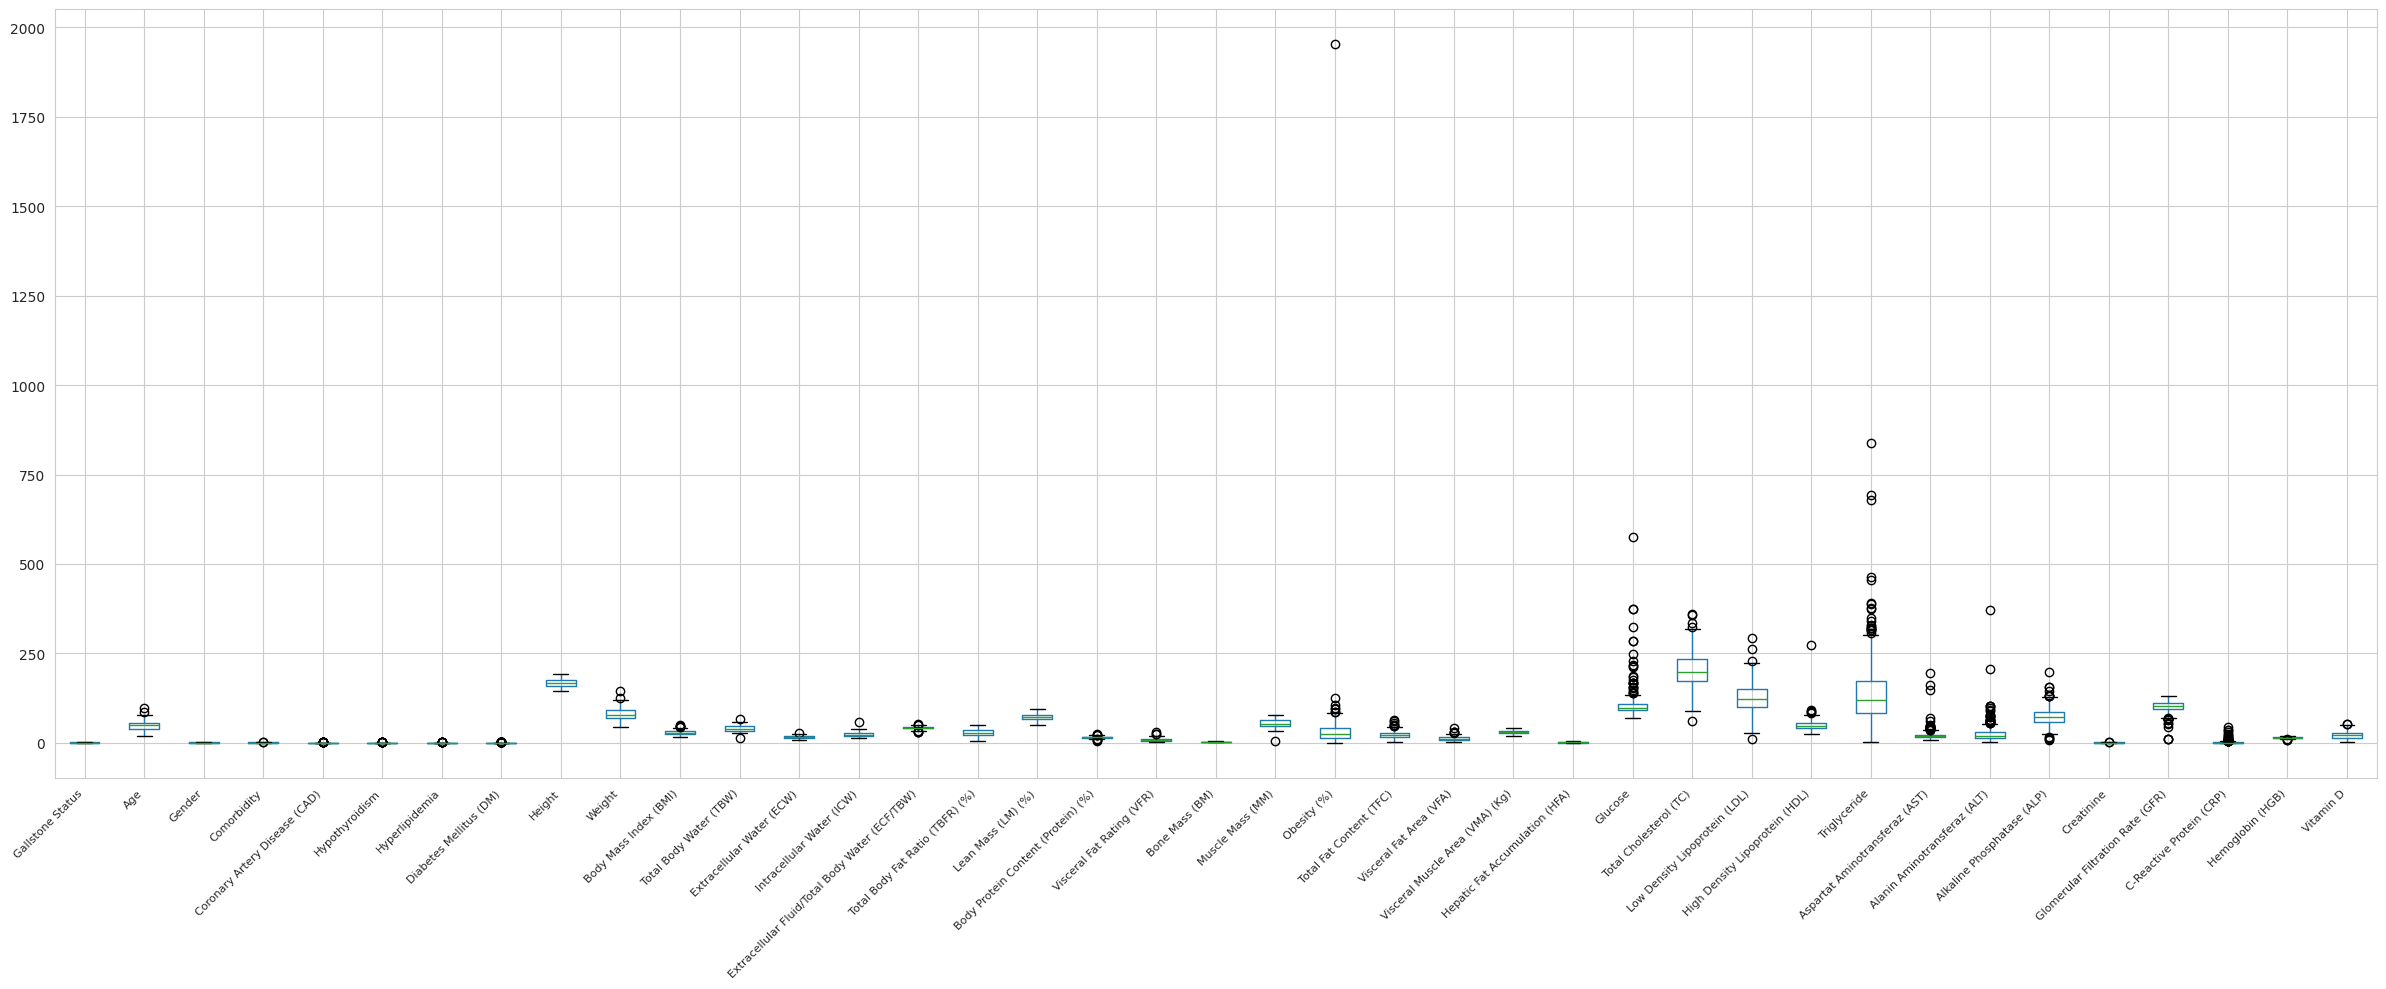

In [8]:
# @title Bloxplots
plt.figure(figsize=(24, 10))
df.boxplot()
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.savefig(f'{dir_figures}/all_bloxplots.png', bbox_inches='tight', dpi=300)
plt.show()

# Treinamento F1
---




In [9]:
# @title Separação das variáveis
# A variável alvo é 'Gallstone Status'

X = df.drop('Gallstone Status', axis=1)
y = df['Gallstone Status']

print("Variáveis de entrada (X) shape:", X.shape)
print("Variável alvo (y) shape:", y.shape)

Variáveis de entrada (X) shape: (319, 38)
Variável alvo (y) shape: (319,)


In [10]:
# @title Divisão Treino e Teste

# 80%/20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25, stratify=y)

print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

'''
X: variáveis de entrada (features).
y: variável alvo (target).
test_size: proporção do conjunto de dados total para teste.
random_state: garantia de reprodutibilidade; garante que a mesma divisão de dados seja gerada.
shuffle(padrão - True): controla se os dados serão embaralhados antes da divisão.
stratify: mantém a proporção de classes no conjunto de treinamento e teste, sendo a mesma do original.
'''

Tamanho do conjunto de treino: (255, 38)
Tamanho do conjunto de teste: (64, 38)


'\nX: variáveis de entrada (features).\ny: variável alvo (target).\ntest_size: proporção do conjunto de dados total para teste.\nrandom_state: garantia de reprodutibilidade; garante que a mesma divisão de dados seja gerada.\nshuffle(padrão - True): controla se os dados serão embaralhados antes da divisão.\nstratify: mantém a proporção de classes no conjunto de treinamento e teste, sendo a mesma do original.\n'

In [11]:
# @title Escalonamento
'''
Justificativa: Algoritmos como a Regressão Logística são sensíveis à escala das variáveis.
StandardScaler transforma os dados para terem média 0 e desvio padrão 1.
'''
scaler = StandardScaler()

# Ajuste do scaler APENAS com os dados de treino para evitar vazamento de dados (data leakage)
X_train_scaled = scaler.fit_transform(X_train)
# Aplicamos a mesma transformação aos dados de teste
X_test_scaled = scaler.transform(X_test)

In [12]:
# @title GridSeachCV

#Definir a estratégia de validação cruzada
kfold = KFold(n_splits=10, shuffle=True, random_state=25)

#Definir os modelos e seus respectivos grids de hiper-parâmetros
# Regressão Logística
log_reg_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'], # três parametros em cada
    'solver': ['liblinear'] # Bom para datasets pequenos
}
log_reg = LogisticRegression(random_state=25)
grid_log_reg = GridSearchCV(log_reg, log_reg_params, cv=kfold, scoring='f1', n_jobs=-1, return_train_score=True)

# Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestClassifier(random_state=25)
grid_rf = GridSearchCV(rf, rf_params, cv=kfold, scoring='f1', n_jobs=-1, return_train_score=True)


In [13]:
# @title Treinamento

print("Iniciando o treinamento da Regressão Logística...")
grid_log_reg.fit(X_train_scaled, y_train)
print("Treinamento da Regressão Logística concluído.")

print("\nIniciando o treinamento do Random Forest...")
grid_rf.fit(X_train_scaled, y_train)
print("Treinamento do Random Forest concluído.")

Iniciando o treinamento da Regressão Logística...
Treinamento da Regressão Logística concluído.

Iniciando o treinamento do Random Forest...
Treinamento do Random Forest concluído.


In [14]:
# @title Melhores parâmetros e scores
print("--- Resultados da Regressão Logística ---")
print("Melhores Hiper-parâmetros:", grid_log_reg.best_params_)
print(f"Melhor F1-Score (validação cruzada): {grid_log_reg.best_score_:.4f}")

print("\n--- Resultados do Random Forest ---")
print("Melhores Hiper-parâmetros:", grid_rf.best_params_)
print(f"Melhor F1-Score (validação cruzada): {grid_rf.best_score_:.4f}")

# Coletando os melhores modelos
best_log_reg = grid_log_reg.best_estimator_
best_rf = grid_rf.best_estimator_

--- Resultados da Regressão Logística ---
Melhores Hiper-parâmetros: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Melhor F1-Score (validação cruzada): 0.7526

--- Resultados do Random Forest ---
Melhores Hiper-parâmetros: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Melhor F1-Score (validação cruzada): 0.7505


In [15]:
# Resultados Regressão Logística
results_log_reg = pd.DataFrame(grid_log_reg.cv_results_)
print("\n--- Análise da Validação Cruzada: Regressão Logística ---")
print("Médias por combinação:", results_log_reg['mean_test_score'].values)
print("Desvios padrão por combinação:", results_log_reg['std_test_score'].values)

# Resultados Random Forest
results_rf = pd.DataFrame(grid_rf.cv_results_)
print("\n--- Análise da Validação Cruzada: Random Forest ---")
print("Médias por combinação:", results_rf['mean_test_score'].values)
print("Desvios padrão por combinação:", results_rf['std_test_score'].values)

# Para verificar partições individualmente:
print("\nScores por split (Regressão Logística):")
split_cols_log = [col for col in results_log_reg.columns if "split" in col and "test" in col]
print(results_log_reg[split_cols_log].T)

print("\nScores por split (Random Forest):")
split_cols_rf = [col for col in results_rf.columns if "split" in col and "test" in col]
print(results_rf[split_cols_rf].T)

# Exemplo de checagem de consistência (diferença entre splits)
print("\n--- Consistência entre partições ---")
print("LogReg - maior variação entre splits:", 
      np.max(results_log_reg[split_cols_log].max() - results_log_reg[split_cols_log].min()))
print("Random Forest - maior variação entre splits:", 
      np.max(results_rf[split_cols_rf].max() - results_rf[split_cols_rf].min()))


--- Análise da Validação Cruzada: Regressão Logística ---
Médias por combinação: [0.71694265 0.73091388 0.7374631  0.74618027 0.75258436 0.74813467]
Desvios padrão por combinação: [0.09288196 0.09009795 0.09790056 0.10386967 0.10856862 0.12219341]

--- Análise da Validação Cruzada: Random Forest ---
Médias por combinação: [0.73113438 0.72324968 0.73759179 0.71350269 0.72968195 0.73035859
 0.7382378  0.75047487 0.74031585 0.73828584 0.72769999 0.74588269
 0.70225606 0.73243744 0.73080018 0.73914863 0.73921669 0.73723893
 0.73113438 0.72324968 0.73759179 0.71350269 0.72968195 0.73035859
 0.7382378  0.75047487 0.74031585]
Desvios padrão por combinação: [0.10195977 0.08276093 0.08979302 0.08018262 0.09717848 0.07120421
 0.10452387 0.07156895 0.07402405 0.10756038 0.07719951 0.07724304
 0.09993591 0.08956793 0.07038521 0.11261322 0.07372714 0.07209355
 0.10195977 0.08276093 0.08979302 0.08018262 0.09717848 0.07120421
 0.10452387 0.07156895 0.07402405]

Scores por split (Regressão Logística

In [43]:
# Definir métricas a serem avaliadas
scoring = {
    'f1': 'f1'
}

# Validação cruzada com melhores hiperparâmetros
cv_results_log = cross_validate(
    best_log_reg,
    X_train_scaled,
    y_train,
    cv=kfold,
    scoring=scoring,
    return_train_score=False
)

cv_results_rf = cross_validate(
    best_rf,
    X_train_scaled,
    y_train,
    cv=kfold,
    scoring=scoring,
    return_train_score=False
)

# Função auxiliar para média ± desvio padrão
def mean_std_dict(cv_results):
    return {
        m: f"{cv_results[f'test_{m}'].mean():.4f} ± {cv_results[f'test_{m}'].std():.4f}"
        for m in scoring.keys()
    }

# Construindo DataFrame com os resultados
metrics_log = mean_std_dict(cv_results_log)
metrics_rf = mean_std_dict(cv_results_rf)

df_results = pd.DataFrame([metrics_log, metrics_rf],
                          index=["Regressão Logística", "Random Forest"])

print(df_results)

# Exportar tabela em LaTeX
latex_table = df_results.to_latex(
    escape=False,
    caption="Resultados médios (± desvio padrão) da validação cruzada (k-fold) com melhores hiperparâmetros",
    label="tab:cv_results"
)

print(latex_table)

                                  f1
Regressão Logística  0.7526 ± 0.1086
Random Forest        0.7382 ± 0.1045
\begin{table}
\caption{Resultados médios (± desvio padrão) da validação cruzada (k-fold) com melhores hiperparâmetros}
\label{tab:cv_results}
\begin{tabular}{ll}
\toprule
 & f1 \\
\midrule
Regressão Logística & 0.7526 ± 0.1086 \\
Random Forest & 0.7382 ± 0.1045 \\
\bottomrule
\end{tabular}
\end{table}



In [44]:
import pandas as pd
from sklearn.model_selection import cross_validate

# Definir métricas a serem avaliadas
scoring = {'f1': 'f1'}

# Validação cruzada com melhores hiperparâmetros
cv_results_log = cross_validate(
    best_log_reg,
    X_train_scaled,
    y_train,
    cv=kfold,
    scoring=scoring,
    return_train_score=False
)

cv_results_rf = cross_validate(
    best_rf,
    X_train_scaled,
    y_train,
    cv=kfold,
    scoring=scoring,
    return_train_score=False
)

# Criar DataFrame com valores de cada fold
folds = [f'Fold {i+1}' for i in range(kfold.get_n_splits())]

df_log = pd.DataFrame(cv_results_log['test_f1'].reshape(1, -1), index=['Regressão Logística'], columns=folds)
df_rf  = pd.DataFrame(cv_results_rf['test_f1'].reshape(1, -1), index=['Random Forest'], columns=folds)

df_folds = pd.concat([df_log, df_rf])

print(df_folds)

# Exportar tabela em LaTeX
latex_table_folds = df_folds.to_latex(
    float_format="%.4f",
    escape=False,
    caption="F1-Score de cada fold na validação cruzada (k-fold) com melhores hiperparâmetros",
    label="tab:cv_folds"
)

print(latex_table_folds)


                       Fold 1    Fold 2    Fold 3  Fold 4    Fold 5    Fold 6  \
Regressão Logística  0.823529  0.857143  0.666667  0.7500  0.814815  0.880000   
Random Forest        0.470588  0.785714  0.833333  0.8125  0.740741  0.785714   

                       Fold 7    Fold 8  Fold 9   Fold 10  
Regressão Logística  0.588235  0.800000    0.80  0.545455  
Random Forest        0.782609  0.814815    0.72  0.636364  
\begin{table}
\caption{F1-Score de cada fold na validação cruzada (k-fold) com melhores hiperparâmetros}
\label{tab:cv_folds}
\begin{tabular}{lrrrrrrrrrr}
\toprule
 & Fold 1 & Fold 2 & Fold 3 & Fold 4 & Fold 5 & Fold 6 & Fold 7 & Fold 8 & Fold 9 & Fold 10 \\
\midrule
Regressão Logística & 0.8235 & 0.8571 & 0.6667 & 0.7500 & 0.8148 & 0.8800 & 0.5882 & 0.8000 & 0.8000 & 0.5455 \\
Random Forest & 0.4706 & 0.7857 & 0.8333 & 0.8125 & 0.7407 & 0.7857 & 0.7826 & 0.8148 & 0.7200 & 0.6364 \\
\bottomrule
\end{tabular}
\end{table}



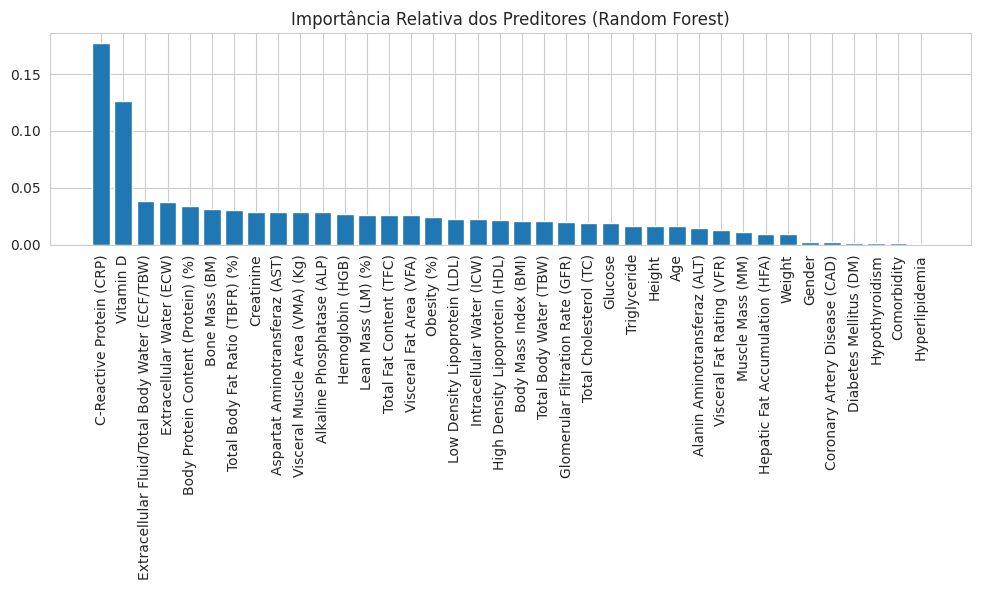

In [16]:
# Importância relativa
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Visualização (Painel A)
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title("Importância Relativa dos Preditores (Random Forest)")
plt.tight_layout()
plt.show()

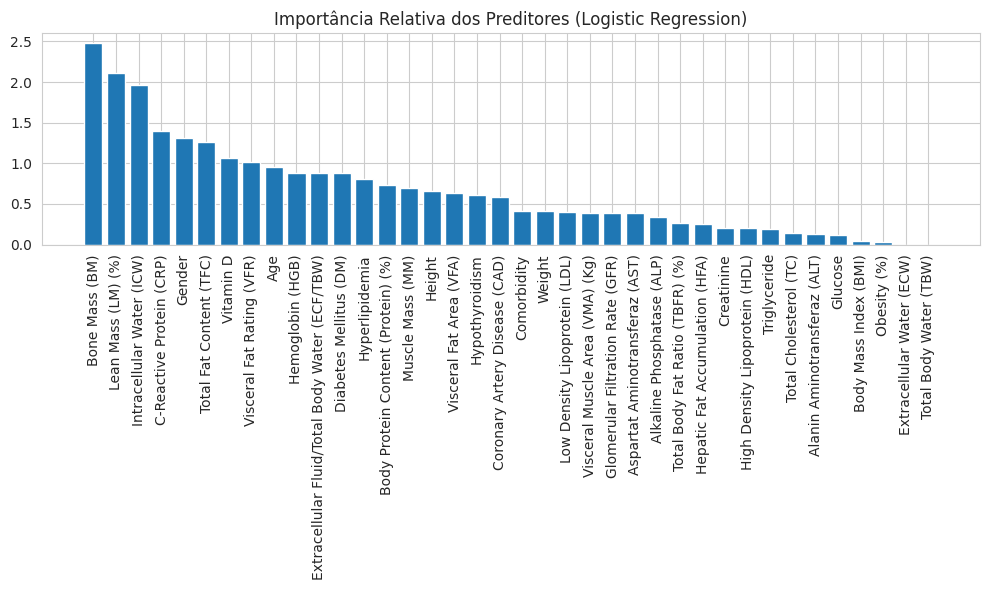

In [17]:
# Importância relativa (magnitude dos coeficientes)
importances = np.abs(best_log_reg.coef_[0])  # Para classificação binária
indices = np.argsort(importances)[::-1]

# Visualização (Painel B)
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title("Importância Relativa dos Preditores (Logistic Regression)")
plt.tight_layout()
plt.show()

In [18]:
# @title Avaliação

models = {'Regressão Logística': best_log_reg, 'Random Forest': best_rf}
results = []

for name, model in models.items():
    # Fazer predições no conjunto de teste
    y_pred = model.predict(X_test_scaled)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, accuracy, precision, recall, f1])

# Criar DataFrame com os resultados
results_df = pd.DataFrame(results, columns=['Modelo', 'Acurácia', 'Precisão', 'Recall', 'F1-Score'])

print("Tabela Comparativa de Desempenho no Conjunto de Teste:")
display(results_df.round(4))

Tabela Comparativa de Desempenho no Conjunto de Teste:


,Modelo,Acurácia,Precisão,Recall,F1-Score
0,Regressão Logística,0.7500,0.7857,0.6875,0.7333
1,Random Forest,0.8438,0.8929,0.7812,0.8333


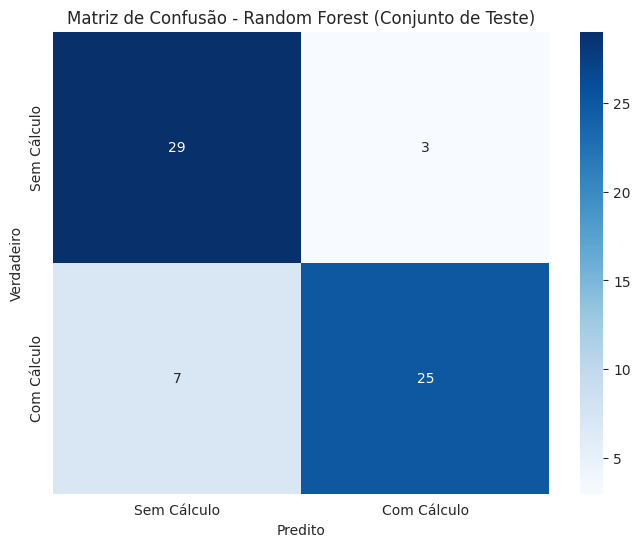

Verdadeiros Negativos (TN): 29 - Pacientes sem cálculo corretamente classificados.
Falsos Positivos (FP): 3 - Pacientes sem cálculo incorretamente classificados como 'com cálculo'.
Falsos Negativos (FN): 7 - Pacientes com cálculo incorretamente classificados como 'sem cálculo'. (ERRO MAIS CRÍTICO)
Verdadeiros Positivos (TP): 25 - Pacientes com cálculo corretamente classificados.


In [19]:
# @title Matriz de Confusão (RF)
y_pred_rf = best_rf.predict(X_test_scaled)
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Sem Cálculo', 'Com Cálculo'],
            yticklabels=['Sem Cálculo', 'Com Cálculo'])
plt.title('Matriz de Confusão - Random Forest (Conjunto de Teste)')
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.savefig(f'{dir_figures}/confusion_matrix_rf_f1.png', bbox_inches='tight', dpi=300)
plt.show()

# Extraindo os valores da matriz de confusão
tn, fp, fn, tp = cm_rf.ravel()
print(f"Verdadeiros Negativos (TN): {tn} - Pacientes sem cálculo corretamente classificados.")
print(f"Falsos Positivos (FP): {fp} - Pacientes sem cálculo incorretamente classificados como 'com cálculo'.")
print(f"Falsos Negativos (FN): {fn} - Pacientes com cálculo incorretamente classificados como 'sem cálculo'. (ERRO MAIS CRÍTICO)")
print(f"Verdadeiros Positivos (TP): {tp} - Pacientes com cálculo corretamente classificados.")

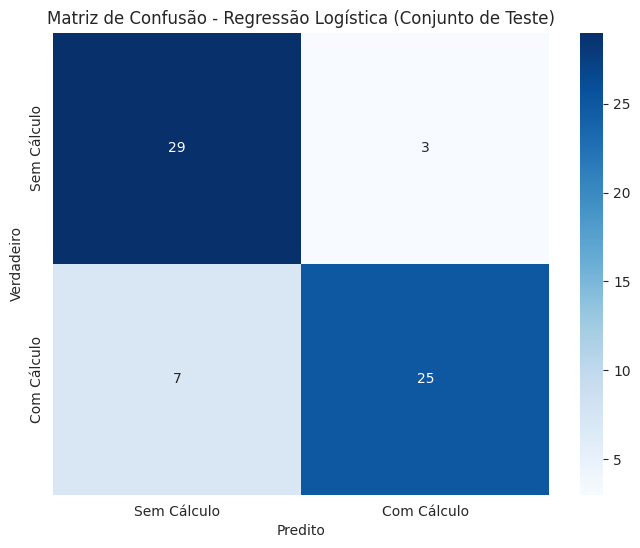

Verdadeiros Negativos (TN): 29 - Pacientes sem cálculo corretamente classificados.
Falsos Positivos (FP): 3 - Pacientes sem cálculo incorretamente classificados como 'com cálculo'.
Falsos Negativos (FN): 7 - Pacientes com cálculo incorretamente classificados como 'sem cálculo'. (ERRO MAIS CRÍTICO)
Verdadeiros Positivos (TP): 25 - Pacientes com cálculo corretamente classificados.


In [20]:
# @title Matriz de Confusão (LR)

y_pred_lr = best_log_reg.predict(X_test_scaled)
cm_lr = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Sem Cálculo', 'Com Cálculo'],
            yticklabels=['Sem Cálculo', 'Com Cálculo'])
plt.title('Matriz de Confusão - Regressão Logística (Conjunto de Teste)')
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.savefig(f'{dir_figures}/confusion_matrix_lr_f1.png', bbox_inches='tight', dpi=300)
plt.show()

# Extraindo os valores da matriz de confusão
tn, fp, fn, tp = cm_lr.ravel()
print(f"Verdadeiros Negativos (TN): {tn} - Pacientes sem cálculo corretamente classificados.")
print(f"Falsos Positivos (FP): {fp} - Pacientes sem cálculo incorretamente classificados como 'com cálculo'.")
print(f"Falsos Negativos (FN): {fn} - Pacientes com cálculo incorretamente classificados como 'sem cálculo'. (ERRO MAIS CRÍTICO)")
print(f"Verdadeiros Positivos (TP): {tp} - Pacientes com cálculo corretamente classificados.")

# Treinamento Precision
---




In [21]:
# @title Separação das variáveis

# A variável alvo é 'Gallstone Status'
X = df.drop('Gallstone Status', axis=1)
y = df['Gallstone Status']

print("Variáveis de entrada (X) shape:", X.shape)
print("Variável alvo (y) shape:", y.shape)

Variáveis de entrada (X) shape: (319, 38)
Variável alvo (y) shape: (319,)


In [22]:
# @title Divisão Treino e Teste

# 80%/20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25, stratify=y)

print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

'''
X: variáveis de entrada (features).
y: variável alvo (target).
test_size: proporção do conjunto de dados total para teste.
random_state: garantia de reprodutibilidade; garante que a mesma divisão de dados seja gerada.
shuffle(padrão - True): controla se os dados serão embaralhados antes da divisão.
stratify: mantém a proporção de classes no conjunto de treinamento e teste, sendo a mesma do original.
'''

Tamanho do conjunto de treino: (255, 38)
Tamanho do conjunto de teste: (64, 38)


'\nX: variáveis de entrada (features).\ny: variável alvo (target).\ntest_size: proporção do conjunto de dados total para teste.\nrandom_state: garantia de reprodutibilidade; garante que a mesma divisão de dados seja gerada.\nshuffle(padrão - True): controla se os dados serão embaralhados antes da divisão.\nstratify: mantém a proporção de classes no conjunto de treinamento e teste, sendo a mesma do original.\n'

In [23]:
# @title Escalonamento
'''
Justificativa: Algoritmos como a Regressão Logística são sensíveis à escala das variáveis.
StandardScaler transforma os dados para terem média 0 e desvio padrão 1.
'''

scaler = StandardScaler()

# Ajuste do scaler APENAS com os dados de treino para evitar vazamento de dados (data leakage)
X_train_scaled = scaler.fit_transform(X_train)
# Aplicamos a mesma transformação aos dados de teste
X_test_scaled = scaler.transform(X_test)

In [24]:
# @title GridSeachCV

#Definir a estratégia de validação cruzada
kfold = KFold(n_splits=10, shuffle=True, random_state=25)

#Definir os modelos e seus respectivos grids de hiper-parâmetros
# Regressão Logística
log_reg_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'], # três parametros em cada
    'solver': ['liblinear'] # Bom para datasets pequenos
}
log_reg = LogisticRegression(random_state=25)
grid_log_reg = GridSearchCV(log_reg, log_reg_params, cv=kfold, scoring='precision', n_jobs=-1)

# Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestClassifier(random_state=25)
grid_rf = GridSearchCV(rf, rf_params, cv=kfold, scoring='precision', n_jobs=-1)

In [25]:
# @title Treinamento

print("Iniciando o treinamento da Regressão Logística...")
grid_log_reg.fit(X_train_scaled, y_train)
print("Treinamento da Regressão Logística concluído.")

print("\nIniciando o treinamento do Random Forest...")
grid_rf.fit(X_train_scaled, y_train)
print("Treinamento do Random Forest concluído.")

Iniciando o treinamento da Regressão Logística...
Treinamento da Regressão Logística concluído.

Iniciando o treinamento do Random Forest...
Treinamento do Random Forest concluído.


In [26]:
# @title Melhores parâmetros e scores
print("--- Resultados da Regressão Logística ---")
print("Melhores Hiper-parâmetros:", grid_log_reg.best_params_)
print(f"Melhor F1-Score (validação cruzada): {grid_log_reg.best_score_:.4f}")

print("\n--- Resultados do Random Forest ---")
print("Melhores Hiper-parâmetros:", grid_rf.best_params_)
print(f"Melhor F1-Score (validação cruzada): {grid_rf.best_score_:.4f}")

# Coletando os melhores modelos
best_log_reg = grid_log_reg.best_estimator_
best_rf = grid_rf.best_estimator_

--- Resultados da Regressão Logística ---
Melhores Hiper-parâmetros: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Melhor F1-Score (validação cruzada): 0.7996

--- Resultados do Random Forest ---
Melhores Hiper-parâmetros: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Melhor F1-Score (validação cruzada): 0.7745


In [27]:
# @title Avaliação

if 'df' in locals():
    models = {'Regressão Logística': best_log_reg, 'Random Forest': best_rf}
    results = []

    for name, model in models.items():
        # Fazer predições no conjunto de teste
        y_pred = model.predict(X_test_scaled)

        # Calcular métricas
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        results.append([name, accuracy, precision, recall, f1])

    # Criar DataFrame com os resultados
    results_df = pd.DataFrame(results, columns=['Modelo', 'Acurácia', 'Precisão', 'Recall', 'F1-Score'])

    print("Tabela Comparativa de Desempenho no Conjunto de Teste:")
    display(results_df.round(4))

Tabela Comparativa de Desempenho no Conjunto de Teste:


,Modelo,Acurácia,Precisão,Recall,F1-Score
0,Regressão Logística,0.7500,0.7857,0.6875,0.7333
1,Random Forest,0.8125,0.8333,0.7812,0.8065


In [28]:
# # @title Matriz de Confusão (RF)

# y_pred_rf = best_rf.predict(X_test_scaled)
# cm = confusion_matrix(y_test, y_pred_rf)

# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#             xticklabels=['Sem Cálculo', 'Com Cálculo'],
#             yticklabels=['Sem Cálculo', 'Com Cálculo'])
# plt.title('Matriz de Confusão - Random Forest (Conjunto de Teste)')
# plt.ylabel('Verdadeiro')
# plt.xlabel('Predito')
# plt.savefig(f'{dir_figures}/confusion_matrix_rf_precision.png', bbox_inches='tight', dpi=300)
# plt.show()

# # Extraindo os valores da matriz de confusão
# tn, fp, fn, tp = cm.ravel()
# print(f"Verdadeiros Negativos (TN): {tn} - Pacientes sem cálculo corretamente classificados.")
# print(f"Falsos Positivos (FP): {fp} - Pacientes sem cálculo incorretamente classificados como 'com cálculo'.")
# print(f"Falsos Negativos (FN): {fn} - Pacientes com cálculo incorretamente classificados como 'sem cálculo'. (ERRO MAIS CRÍTICO)")
# print(f"Verdadeiros Positivos (TP): {tp} - Pacientes com cálculo corretamente classificados.")

In [29]:
# # @title Matriz de Confusão (LR)
# y_pred_lr = best_log_reg.predict(X_test_scaled)
# cm = confusion_matrix(y_test, y_pred_rf)

# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#             xticklabels=['Sem Cálculo', 'Com Cálculo'],
#             yticklabels=['Sem Cálculo', 'Com Cálculo'])
# plt.title('Matriz de Confusão - Regressão Logística (Conjunto de Teste)')
# plt.ylabel('Verdadeiro')
# plt.xlabel('Predito')
# plt.savefig(f'{dir_figures}/confusion_matrix_lr_precision.png', bbox_inches='tight', dpi=300)
# plt.show()

# # Extraindo os valores da matriz de confusão
# tn, fp, fn, tp = cm.ravel()
# print(f"Verdadeiros Negativos (TN): {tn} - Pacientes sem cálculo corretamente classificados.")
# print(f"Falsos Positivos (FP): {fp} - Pacientes sem cálculo incorretamente classificados como 'com cálculo'.")
# print(f"Falsos Negativos (FN): {fn} - Pacientes com cálculo incorretamente classificados como 'sem cálculo'. (ERRO MAIS CRÍTICO)")
# print(f"Verdadeiros Positivos (TP): {tp} - Pacientes com cálculo corretamente classificados.")

# Treinamento Recall
---




In [30]:
# @title Separação das variáveis

# A variável alvo é 'Gallstone Status'
X = df.drop('Gallstone Status', axis=1)
y = df['Gallstone Status']

print("Variáveis de entrada (X) shape:", X.shape)
print("Variável alvo (y) shape:", y.shape)

Variáveis de entrada (X) shape: (319, 38)
Variável alvo (y) shape: (319,)


In [31]:
# @title Divisão Treino e Teste

# 80%/20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25, stratify=y)

print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

'''
X: variáveis de entrada (features).
y: variável alvo (target).
test_size: proporção do conjunto de dados total para teste.
random_state: garantia de reprodutibilidade; garante que a mesma divisão de dados seja gerada.
shuffle(padrão - True): controla se os dados serão embaralhados antes da divisão.
stratify: mantém a proporção de classes no conjunto de treinamento e teste, sendo a mesma do original.
'''

Tamanho do conjunto de treino: (255, 38)
Tamanho do conjunto de teste: (64, 38)


'\nX: variáveis de entrada (features).\ny: variável alvo (target).\ntest_size: proporção do conjunto de dados total para teste.\nrandom_state: garantia de reprodutibilidade; garante que a mesma divisão de dados seja gerada.\nshuffle(padrão - True): controla se os dados serão embaralhados antes da divisão.\nstratify: mantém a proporção de classes no conjunto de treinamento e teste, sendo a mesma do original.\n'

In [32]:
# @title Escalonamento
'''
Justificativa: Algoritmos como a Regressão Logística são sensíveis à escala das variáveis.
StandardScaler transforma os dados para terem média 0 e desvio padrão 1.
'''

scaler = StandardScaler()

# Ajuste do scaler APENAS com os dados de treino para evitar vazamento de dados (data leakage)
X_train_scaled = scaler.fit_transform(X_train)
# Aplicamos a mesma transformação aos dados de teste
X_test_scaled = scaler.transform(X_test)

In [33]:
# @title GridSeachCV

#Definir a estratégia de validação cruzada
kfold = KFold(n_splits=10, shuffle=True, random_state=25)

#Definir os modelos e seus respectivos grids de hiper-parâmetros
# Regressão Logística
log_reg_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'], # três parametros em cada
    'solver': ['liblinear'] # Bom para datasets pequenos
}
log_reg = LogisticRegression(random_state=25)
grid_log_reg = GridSearchCV(log_reg, log_reg_params, cv=kfold, scoring='recall', n_jobs=-1)

# Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestClassifier(random_state=25)
grid_rf = GridSearchCV(rf, rf_params, cv=kfold, scoring='recall', n_jobs=-1)


In [34]:
# @title Treinamento

print("Iniciando o treinamento da Regressão Logística...")
grid_log_reg.fit(X_train_scaled, y_train)
print("Treinamento da Regressão Logística concluído.")

print("\nIniciando o treinamento do Random Forest...")
grid_rf.fit(X_train_scaled, y_train)
print("Treinamento do Random Forest concluído.")

Iniciando o treinamento da Regressão Logística...
Treinamento da Regressão Logística concluído.

Iniciando o treinamento do Random Forest...
Treinamento do Random Forest concluído.


In [35]:
# @title Melhores parâmetros e scores

print("--- Resultados da Regressão Logística ---")
print("Melhores Hiper-parâmetros:", grid_log_reg.best_params_)
print(f"Melhor F1-Score (validação cruzada): {grid_log_reg.best_score_:.4f}")

print("\n--- Resultados do Random Forest ---")
print("Melhores Hiper-parâmetros:", grid_rf.best_params_)
print(f"Melhor F1-Score (validação cruzada): {grid_rf.best_score_:.4f}")

# Coletando os melhores modelos
best_log_reg = grid_log_reg.best_estimator_
best_rf = grid_rf.best_estimator_

--- Resultados da Regressão Logística ---
Melhores Hiper-parâmetros: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Melhor F1-Score (validação cruzada): 0.7293

--- Resultados do Random Forest ---
Melhores Hiper-parâmetros: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
Melhor F1-Score (validação cruzada): 0.7482


In [36]:
# @title Avaliação

models = {'Regressão Logística': best_log_reg, 'Random Forest': best_rf}
results = []

for name, model in models.items():
    # Fazer predições no conjunto de teste
    y_pred = model.predict(X_test_scaled)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, accuracy, precision, recall, f1])

# Criar DataFrame com os resultados
results_df = pd.DataFrame(results, columns=['Modelo', 'Acurácia', 'Precisão', 'Recall', 'F1-Score'])

print("Tabela Comparativa de Desempenho no Conjunto de Teste:")
display(results_df.round(4))

Tabela Comparativa de Desempenho no Conjunto de Teste:


,Modelo,Acurácia,Precisão,Recall,F1-Score
0,Regressão Logística,0.7500,0.7857,0.6875,0.7333
1,Random Forest,0.7812,0.7812,0.7812,0.7812


In [37]:
# # @title Matriz de Confusão (RF)
# y_pred_rf = best_rf.predict(X_test_scaled)
# cm = confusion_matrix(y_test, y_pred_rf)

# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#             xticklabels=['Sem Cálculo', 'Com Cálculo'],
#             yticklabels=['Sem Cálculo', 'Com Cálculo'])
# plt.title('Matriz de Confusão - Random Forest (Conjunto de Teste)')
# plt.ylabel('Verdadeiro')
# plt.xlabel('Predito')
# plt.savefig(f'{dir_figures}/confusion_matrix_rf_precision.png', bbox_inches='tight', dpi=300)
# plt.show()

# # Extraindo os valores da matriz de confusão
# tn, fp, fn, tp = cm.ravel()
# print(f"Verdadeiros Negativos (TN): {tn} - Pacientes sem cálculo corretamente classificados.")
# print(f"Falsos Positivos (FP): {fp} - Pacientes sem cálculo incorretamente classificados como 'com cálculo'.")
# print(f"Falsos Negativos (FN): {fn} - Pacientes com cálculo incorretamente classificados como 'sem cálculo'. (ERRO MAIS CRÍTICO)")
# print(f"Verdadeiros Positivos (TP): {tp} - Pacientes com cálculo corretamente classificados.")

In [38]:
# # @title Matriz de Confusão (LR)
# y_pred_lr = best_log_reg.predict(X_test_scaled)
# cm = confusion_matrix(y_test, y_pred_rf)

# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#             xticklabels=['Sem Cálculo', 'Com Cálculo'],
#             yticklabels=['Sem Cálculo', 'Com Cálculo'])
# plt.title('Matriz de Confusão - Regressão Logística (Conjunto de Teste)')
# plt.ylabel('Verdadeiro')
# plt.xlabel('Predito')
# plt.savefig(f'{dir_figures}/confusion_matrix_lr_precision.png', bbox_inches='tight', dpi=300)
# plt.show()

# # Extraindo os valores da matriz de confusão
# tn, fp, fn, tp = cm.ravel()
# print(f"Verdadeiros Negativos (TN): {tn} - Pacientes sem cálculo corretamente classificados.")
# print(f"Falsos Positivos (FP): {fp} - Pacientes sem cálculo incorretamente classificados como 'com cálculo'.")
# print(f"Falsos Negativos (FN): {fn} - Pacientes com cálculo incorretamente classificados como 'sem cálculo'. (ERRO MAIS CRÍTICO)")
# print(f"Verdadeiros Positivos (TP): {tp} - Pacientes com cálculo corretamente classificados.")

# K-fold teste
---
---


In [39]:
# @title validação cruzada k-fold again
# avaliação das médias das k execuções dos melhores hiperparâmetros
# erro de generalização dos melhores hiperparâmetros